In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\ml project\7\steam-200k.csv")

In [3]:
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   151603712                   199999 non-null  int64  
 1   The Elder Scrolls V Skyrim  199999 non-null  object 
 2   purchase                    199999 non-null  object 
 3   1.0                         199999 non-null  float64
 4   0                           199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [5]:
df.isnull().sum()

151603712                     0
The Elder Scrolls V Skyrim    0
purchase                      0
1.0                           0
0                             0
dtype: int64

In [6]:
df.describe()

,151603712,1.0,0
count,1.999990e+05,199999.000000,199999.0
mean,1.036556e+08,17.874468,0.0
std,7.208084e+07,138.057292,0.0
min,5.250000e+03,0.100000,0.0
25%,4.738420e+07,1.000000,0.0
50%,8.691201e+07,1.000000,0.0
75%,1.542309e+08,1.300000,0.0
max,3.099031e+08,11754.000000,0.0


In [7]:
df.drop('0',axis=1,inplace=True)

In [8]:
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [9]:
df = df.rename(columns={'151603712': 'user_id', 'The Elder Scrolls V Skyrim':'games','purchase':'status','1.0': 'hours_play'})
df.head()

,user_id,games,status,hours_play
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [10]:
df = df.drop_duplicates(['user_id', 'games'],keep='last')
df.head()

,user_id,games,status,hours_play
0,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,play,87.0
4,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,play,8.9


In [11]:
df.shape

(128804, 4)

In [12]:
df.columns

Index(['user_id', 'games', 'status', 'hours_play'], dtype='object')

In [13]:
df['games'].value_counts()

Dota 2                              4841
Team Fortress 2                     2323
Unturned                            1563
Counter-Strike Global Offensive     1412
Half-Life 2 Lost Coast               981
                                    ... 
iBomber Attack                         1
The Dreamatorium of Dr. Magnus 2       1
Verde Station                          1
TRIP Steam Edition                     1
Executive Assault                      1
Name: games, Length: 5155, dtype: int64

In [14]:
df['status'].value_counts()

play        70205
purchase    58599
Name: status, dtype: int64

## Visualization

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'hours_play'}>]], dtype=object)

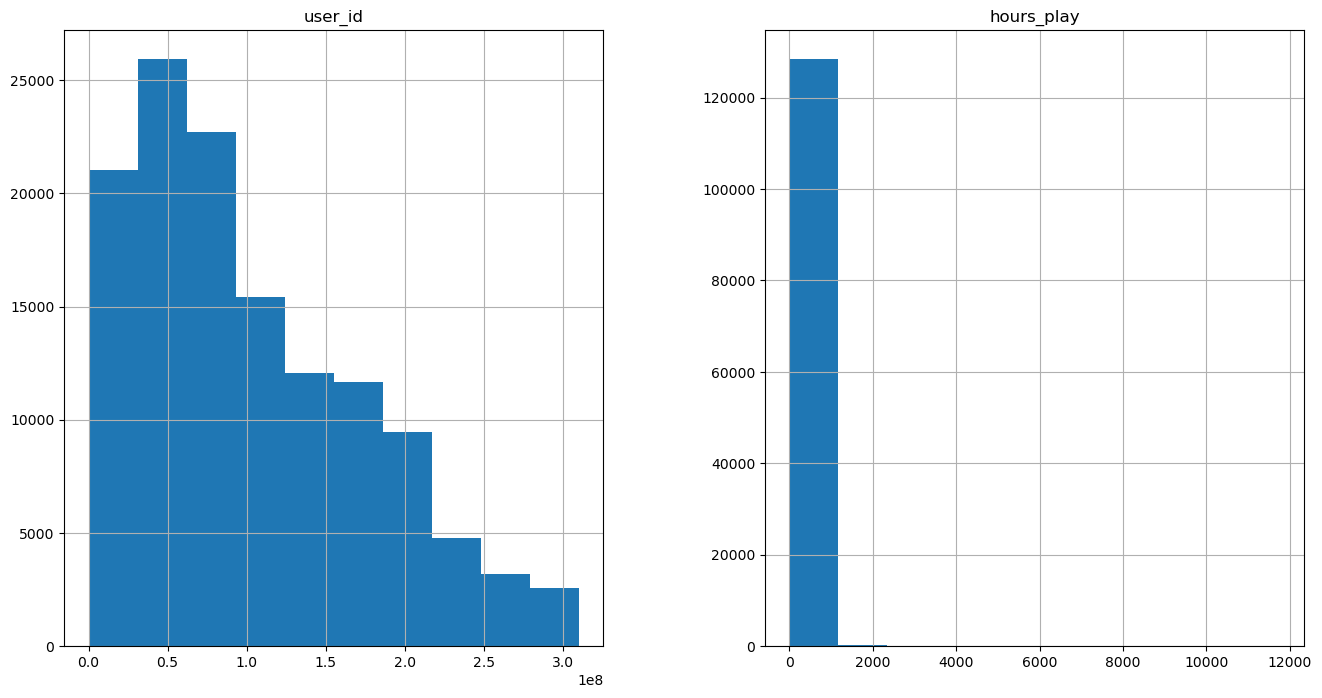

In [15]:
df.hist(figsize=(16,8))

C:\Users\Roshan Salunke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

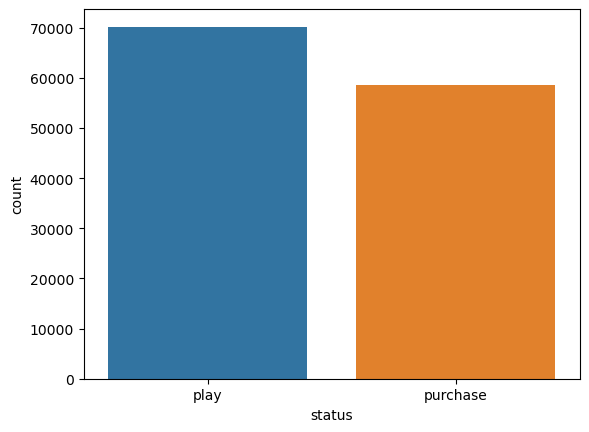

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['status'])

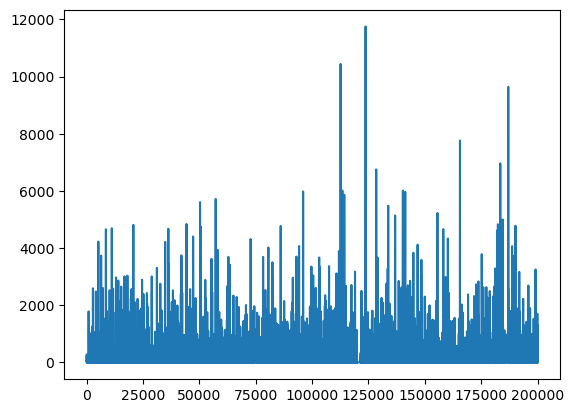

In [17]:
plt.plot(df['hours_play'])

<AxesSubplot:>

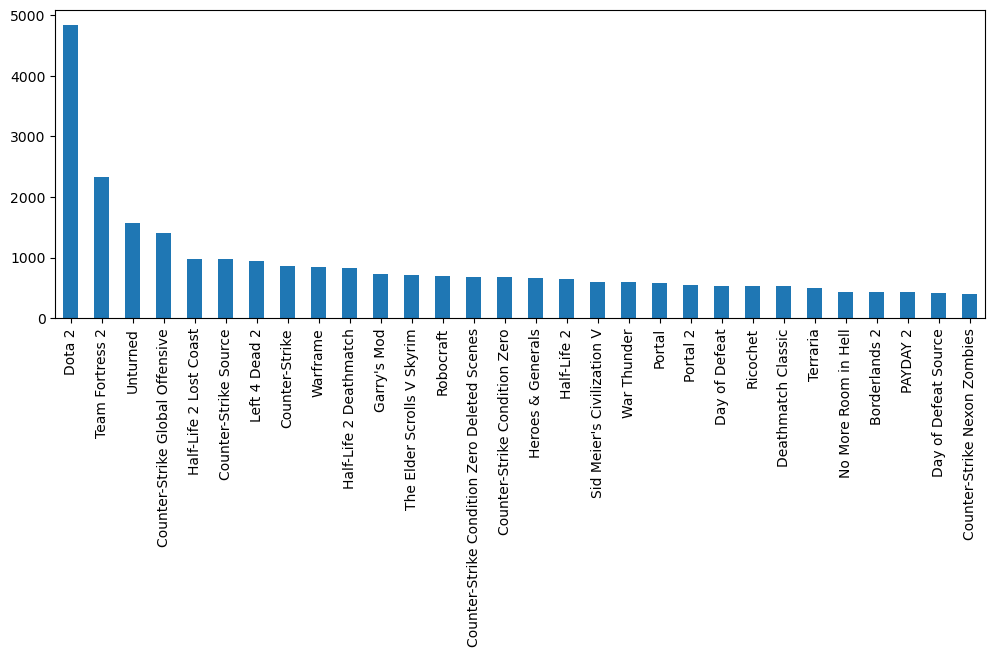

In [18]:
df['games'].value_counts().head(30).plot(kind='bar',figsize=(12,4))

<AxesSubplot:xlabel='status', ylabel='hours_play'>

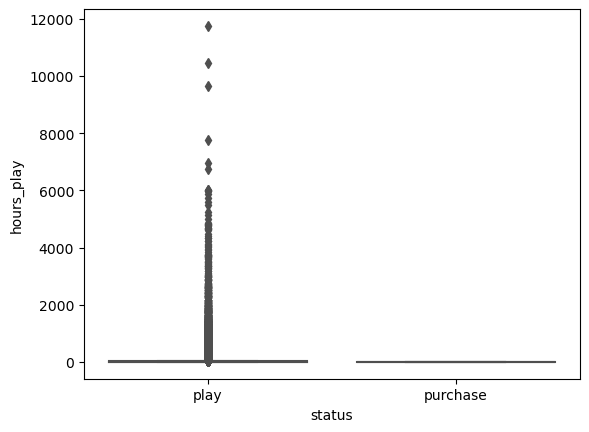

In [19]:
sns.boxplot(x='status',y='hours_play',data=df, palette='rainbow')

In [20]:
df = df[(df['hours_play']>=2) & (df['status'] == 'play')]

df_filtered = df[df.groupby('games').user_id.transform(len)>=20]

In [21]:
df_filtered['games'].nunique()
df_filtered.head(20)

,user_id,games,status,hours_play
0,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,play,87.0
4,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,play,8.9
12,151603712,Path of Exile,play,8.1
16,151603712,Left 4 Dead,play,3.3
18,151603712,Team Fortress 2,play,2.8
20,151603712,Tomb Raider,play,2.5
22,151603712,The Banner Saga,play,2.0


In [22]:
df_filtered['user_id'] = df_filtered['user_id'].astype(str)
average = df_filtered.groupby(['games'], as_index=False).hours_play.mean()

C:\Users\Roshan Salunke\AppData\Local\Temp\ipykernel_18908\3474590363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['user_id'] = df_filtered['user_id'].astype(str)


In [23]:
average['avg_hoursplay'] = average['hours_play']
average.drop('hours_play',axis=1, inplace=True)

In [24]:
final_rating = pd.merge(df_filtered, average[['games','avg_hoursplay']],on='games')

In [25]:
condition = [
    (final_rating['hours_play']>=0.8*final_rating['avg_hoursplay']),
    (final_rating['hours_play']>=0.6*final_rating['avg_hoursplay']) &
    (final_rating['hours_play']<0.8*final_rating['avg_hoursplay']),
    
    (final_rating['hours_play']>0.4*final_rating['avg_hoursplay']) &
    (final_rating['hours_play']<0.6*final_rating['avg_hoursplay']),
    
    (final_rating['hours_play']>0.2*final_rating['avg_hoursplay']) &
    (final_rating['hours_play']<0.4*final_rating['avg_hoursplay']),
    
    final_rating['hours_play']>=0
]

values = [5,4,3,2,1]
final_rating['rating'] = np.select(condition,values)
final_rating

,user_id,games,status,hours_play,avg_hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5
...,...,...,...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",play,23.0,14.109091,5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",play,5.5,14.109091,2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",play,5.8,14.109091,3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",play,24.0,14.109091,5


In [26]:
final_rating = final_rating.drop(['status','hours_play','avg_hoursplay'],axis=1)
final_rating

,user_id,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5
...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",5


In [27]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [28]:
piv = final_rating.pivot_table(index=['user_id'],columns=['games'],values='rating')

In [29]:
print(piv.shape)
piv.head()

(8309, 427)


games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
user_id,,,,,,,,,,,,,,,,,,,,,
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
piv_norm = piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)

piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm !=0).any(axis=0)]

In [31]:
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [32]:
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [33]:
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [34]:
item_sim_df = pd.DataFrame(item_similarity, index=piv_norm.index, columns=piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index=piv_norm.columns, columns=piv_norm.columns)

In [35]:
def top_game(game):
    count = 1
    print('Similar game t0 {} include: \n'.format(game))
    for item in item_sim_df.sort_values(by=game, ascending=False).index[1:11]:
        print('No, {}: {}'.format(count, item))
        count +=1

In [36]:
top_game('Aftermath')

Similar game t0 Aftermath include: 

No, 1: Alice Madness Returns
No, 2: Shadow Warrior
No, 3: Brtal Legend
No, 4: Resident Evil 5 / Biohazard 5
No, 5: Infestation Survivor Stories
No, 6: Call of Juarez Gunslinger
No, 7: The Walking Dead Season Two
No, 8: Counter-Strike Nexon Zombies
No, 9: Star Conflict
No, 10: L.A. Noire


In [37]:
piv_norm.columns

Index(['100057229', '100096071', '100311267', '100322840', '100351493',
       '100359523', '100431715', '100444456', '100519466', '100630947',
       ...
       '994489', '9946133', '99484728', '99640715', '99704390', '99711581',
       '99713453', '99723205', '99766416', '99802512'],
      dtype='object', name='user_id', length=3056)

In [38]:
def top_user(user):
    if user not in piv_norm.columns:
        return (f'No data availabel on user {user}')
    print('Most similar user:\n')
    
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print(f'User {user}, Similarity value: {sim}')

In [39]:
top_user('99484728')

Most similar user:

User 40289887, Similarity value: 0.7302967433402214
User 185494712, Similarity value: 0.7071067811865477
User 16710264, Similarity value: 0.7071067811865477
User 20566124, Similarity value: 0.6666666666666669
User 49769103, Similarity value: 0.6666666666666667
User 15702351, Similarity value: 0.647150228929434
User 161139120, Similarity value: 0.5873012321686746
User 202057920, Similarity value: 0.5773502691896258
User 57271785, Similarity value: 0.5773502691896258
User 33993318, Similarity value: 0.5773502691896258


In [40]:
def similar_user_recs(user):
    if user not in piv_norm.columns:
        return (f'No data availabel on user {user}')
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    
    best = []
    
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:,i].max()
        best.append(piv_norm[piv_norm.loc[:,i]==max_score].index.tolist())
        
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] +=1
            else:
                most_common[j] = 1
    
    sorted_list = sorted(most_common.items(),key=operator.itemgetter(1),reverse=True)
    
    return sorted_list[:5]
    

In [41]:
similar_user_recs('100519466')

[('Robocraft', 6),
 ('BLOCKADE 3D', 2),
 ("Garry's Mod", 2),
 ('ARK Survival Evolved', 1),
 ('Dino D-Day', 1)]

In [42]:
from sklearn.neighbors import NearestNeighbors
knnmodel = NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20, n_jobs=-1)
knnmodel.fit(piv_norm)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [43]:
query_index = np.random.choice(piv_norm.shape[0])

print('Choosen game is: ',piv_norm.index[query_index])

distances, indices = knnmodel.kneighbors(piv_norm.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i ==0:
        print(f'Recommendations for {piv_norm.index[query_index]}\n')
        
    else:
        print(f'{i}, {piv_norm.index[indices.flatten()[i]]}, with distance {distances.flatten()[i]}')

Choosen game is:  Star Wars Jedi Knight Jedi Academy
Recommendations for Star Wars Jedi Knight Jedi Academy

1, Brtal Legend, with distance 0.8633879411444696
2, Insurgency Modern Infantry Combat, with distance 0.8684240227998654
3, Red Faction Guerrilla Steam Edition, with distance 0.8930082068749376
4, Legend of Grimrock, with distance 0.9030493945328347
5, Super Meat Boy, with distance 0.9036066675050332
